In [1]:
import numpy as np
import matplotlib.pyplot as plt
from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevPQC
from squlearn.observables import SummedPaulis
from squlearn.qnn import (
QNNRegressor,
SquaredLoss,
ShotsFromRSTD)
from squlearn.optimizers import Adam

import pennylane as qml

In [2]:
# Initilize encoding circuit
encoding_circuit = ChebyshevPQC(
num_qubits=4, num_features=1, num_layers=1)

# Initilize observable
observable = SummedPaulis(num_qubits=4)

In [3]:
# Set-up QNN regression
qnn = QNNRegressor(
encoding_circuit,
observable,
Executor(qml.device("default.qubit",shots=1024),log_file="qnn_pl.log"),
SquaredLoss(),
Adam(options={"lr": 0.3,"log_file":"adam_pl.log"}),
variance=0.005,
shot_control=ShotsFromRSTD()
)

ennyLane: LowLevelQNNPennyLane
self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.op

In [4]:
# Set training data
x_train = np.arange(-0.7, 0.8, 0.1)
y_train = np.abs(x_train)

In [5]:
# Train the model
qnn.fit(x_train, y_train)

fit: 100%|██████████| 100/100 [17:05<00:00, 10.26s/it]


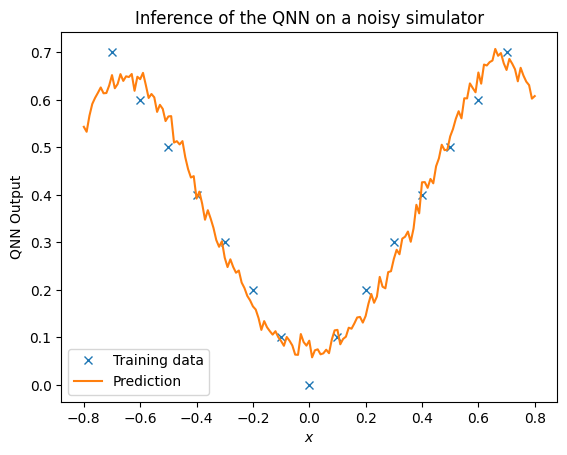

In [6]:
# Data for testing the trained model
x_test = np.arange(-0.8, 0.81, 0.01)
y_test = qnn.predict(x_test)
# Generate a plot of the QNN inference
plt.plot(x_train, y_train, "x", label="Training data")
plt.plot(x_test, y_test, label="Prediction")
plt.title("Inference of the QNN on a noisy simulator")
plt.xlabel("$x$")
plt.ylabel("QNN Output")
plt.legend()
plt.show()
